# travelTime Analysis

Different analyses of data collected using https://github.com/amadeuspzs/travelTime/blob/master/travelTime.py

In [366]:
import csv, math, matplotlib.pyplot as plt, numpy as np, matplotlib.dates as mdates
from datetime import datetime

## Load data

In [495]:
filename = 'data/home-montauk.csv'
title = "Home to Montauk Driving Duration (h)"

In [496]:
reader = csv.DictReader(open(filename, 'rb'))
date = []
duration_h = []

for row in reader:
    date.append(datetime.fromtimestamp(int(row['Timestamp'])))
    duration_h.append(float(row['Duration(s)'])/(60*60))

## Week by Week plots

Parse and display travel time on a week-by-week basis

In [497]:
weeks = find_weeks(date)
num_weeks = len(weeks)-1
num_cols = 2
num_rows = int(math.ceil(float(num_weeks)/float(num_cols)))
ylim = [min(duration_h)-0.05, max(duration_h)+0.05]
print "Found %s weeks" % num_weeks

Found 5 weeks


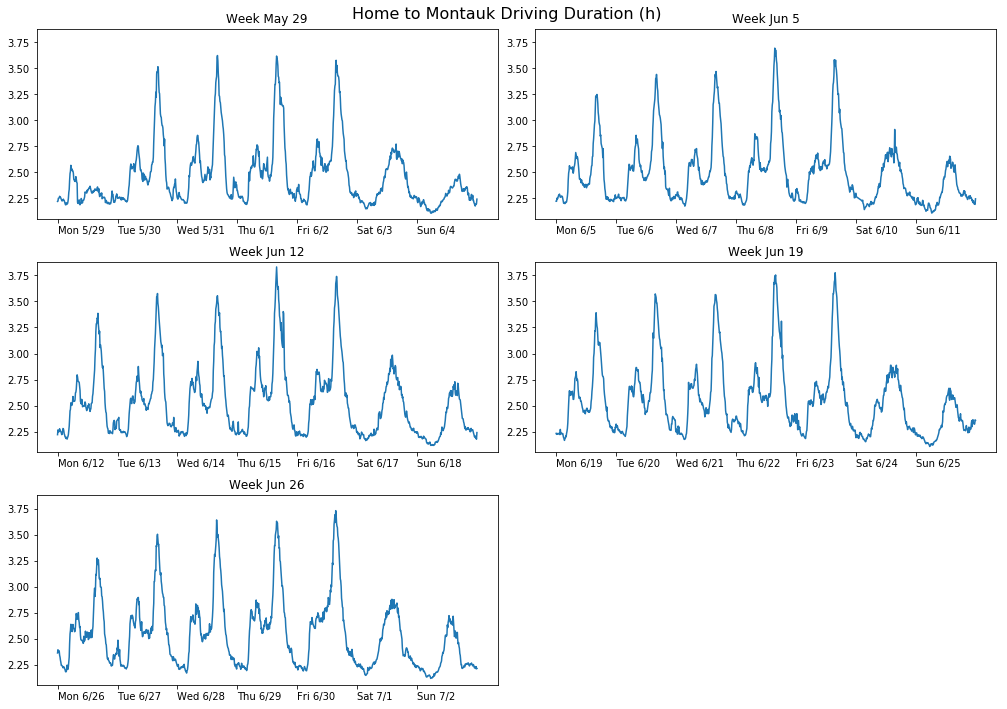

In [498]:
plt.close()
plt.figure(1,figsize=(14, 10))

xfmt = mdates.DateFormatter('%a %-m/%-d')
p=0

for row in xrange(num_rows):
    for col in xrange(num_cols):
        p+=1
        if p <= num_weeks:
            ax=plt.subplot(num_rows,num_cols,p)
            plt.plot(date[weeks[p-1]:weeks[p]], duration_h[weeks[p-1]:weeks[p]])
            plt.title("Week " + date[weeks[p-1]].strftime("%b %-d"))
            ax.xaxis.set_major_formatter(xfmt)
            ax.set_ylim(ylim)
            ax.set_xticks(ax.get_xticks()[:-1]) # hide last Monday
            for tick in ax.xaxis.get_majorticklabels():
                tick.set_horizontalalignment("left")

plt.tight_layout()
plt.suptitle(title, fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

## Long Weekend plots

Focus on Thur-Fri departures

In [481]:
longweekends = find_dayspan(date,4,6) # Thursday through Friday
num_longweekends = len(longweekends)
num_cols = 3
num_rows = int(math.ceil(float(num_longweekends)/float(num_cols)))
local_min = []
local_max = []
for pair in longweekends:
    local_min.append(min(duration_h[pair[0]:pair[1]]))
    local_max.append(max(duration_h[pair[0]:pair[1]]))
ylim = [min(local_min)-0.05, max(local_max)+0.05]
print "Found %s long weekends" % num_longweekends

Found 6 long weekends


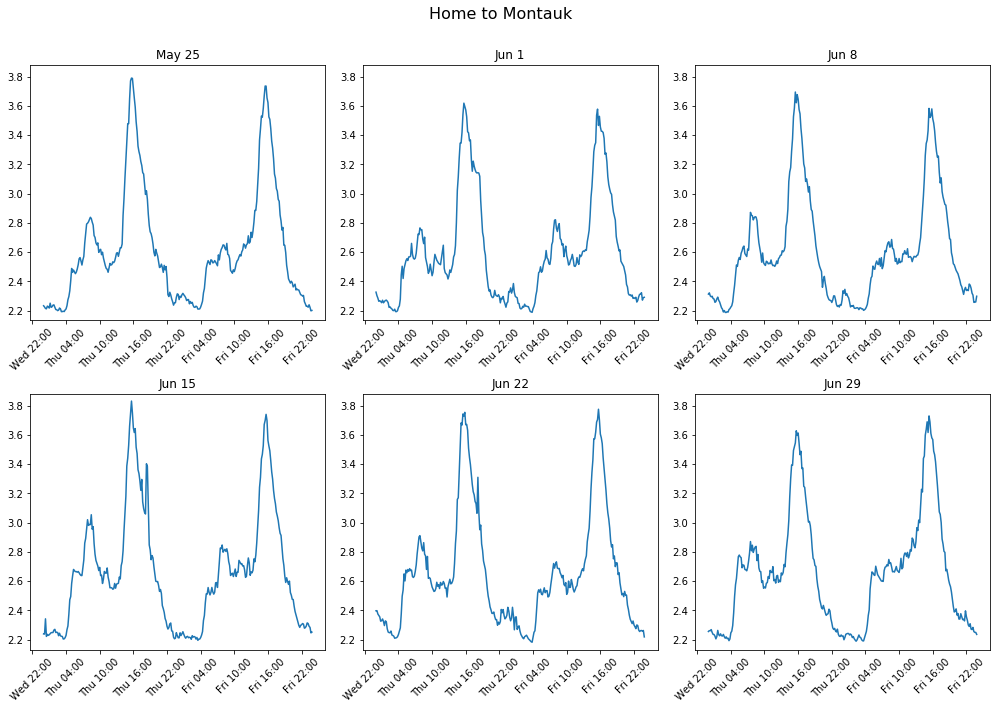

In [480]:
plt.close()
plt.figure(1,figsize=(14, 10))
xfmt = mdates.DateFormatter('%a %H:%M')
p=0

for row in xrange(num_rows):
    for col in xrange(num_cols):
        p+=1
        if p <= num_longweekends:
            ax=plt.subplot(num_rows,num_cols,p)
            plt.plot(date[longweekends[p-1][0]:longweekends[p-1][1]], duration_h[longweekends[p-1][0]:longweekends[p-1][1]])
            plt.title(date[longweekends[p-1][0]].strftime("%b %-d"))
            ax.xaxis.set_major_formatter(xfmt)
            ax.set_ylim(ylim)
            for tick in ax.get_xticklabels():
                tick.set_rotation(45)

plt.tight_layout()
plt.suptitle(title, fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

## Parsing functions

In [429]:
# return list of indexes for start of week (first entry on a Monday)
def find_weeks(datetime):
    week_start = []
    seek_monday = True # flag to iterate over weeks
    for item in datetime:
        if item.strftime("%w") == "1" and seek_monday:
            week_start.append(datetime.index(item))
            seek_monday = False
        elif not seek_monday and item.strftime("%w") == "2":
            # we've clocked over to Tuesday, so look for Monday again
            seek_monday = True
    return week_start

In [461]:
# return pairs of indexes for day spans e.g. long weekends
def find_dayspan(datetime,day_start,day_end):
    data = []
    seek_starting_day = True
    for item in datetime:
        if int(item.strftime("%w")) == day_start and seek_starting_day:
            start = datetime.index(item)
            seek_starting_day = False
        elif not seek_starting_day and int(item.strftime("%w")) == day_end:
            end = datetime.index(item)
            seek_starting_day = True
            data.append([start, end])
    return data